In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image

In [2]:
# load in image
# rescale to 48*48
# generate more data with shift rotate grey scale?
# d = Image.open('.././data/images/train/angry/0.jpg')

In [28]:
img_generator = ImageDataGenerator(rescale=1./255)
size = (48, 48)
train_ds = img_generator.flow_from_directory(
    '.././data/combine_convert/train',
    target_size=size,
    batch_size=32
)
val_ds = img_generator.flow_from_directory(
    '.././data/combine_convert/validation',
    target_size=size,
    batch_size=32
)

class_indi = train_ds.class_indices
class_count= len(class_indi)

Found 47580 images belonging to 7 classes.
Found 12086 images belonging to 7 classes.


In [39]:
from tensorflow.keras.losses import CategoricalCrossentropy,SparseCategoricalCrossentropy
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [44]:
# model
model = keras.Sequential()
model.add(layers.Conv2D(32,(3,3),padding="same",activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(32,(3,3),padding="same",activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(class_count,activation='softmax'))

In [49]:
opt = optimizers.SGD(learning_rate=0.01,momentum=0.9,nesterov=True)
loss = keras.losses.CategoricalCrossentropy()
metric = keras.metrics.CategoricalAccuracy()
model.compile(optimizer=opt,loss=loss,metrics=[metric])

H = model.fit(
    train_ds,
    epochs=40,
    validation_data=val_ds
    
)

Epoch 1/40
1487/1487 [==============================] - 261s 175ms/step - loss: 1.6289 - categorical_accuracy: 0.3579 - val_loss: 1.4435 - val_categorical_accuracy: 0.4521
Epoch 2/40
1487/1487 [==============================] - 20s 13ms/step - loss: 1.4752 - categorical_accuracy: 0.4264 - val_loss: 1.3703 - val_categorical_accuracy: 0.4755
Epoch 3/40
1487/1487 [==============================] - 19s 13ms/step - loss: 1.3950 - categorical_accuracy: 0.4617 - val_loss: 1.3373 - val_categorical_accuracy: 0.4907
Epoch 4/40
1487/1487 [==============================] - 19s 13ms/step - loss: 1.3361 - categorical_accuracy: 0.4869 - val_loss: 1.3109 - val_categorical_accuracy: 0.5060
Epoch 5/40
1487/1487 [==============================] - 19s 13ms/step - loss: 1.2828 - categorical_accuracy: 0.5104 - val_loss: 1.2683 - val_categorical_accuracy: 0.5204
Epoch 6/40
1487/1487 [==============================] - 19s 13ms/step - loss: 1.2313 - categorical_accuracy: 0.5333 - val_loss: 1.2165 - val_categor

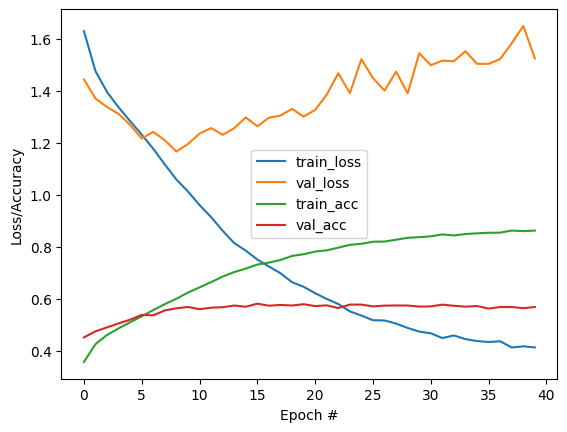

In [61]:
import matplotlib.pyplot as  plt
# plt.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["categorical_accuracy"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_categorical_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
import sklearn
sklearn.metrics.classification_report()

In [64]:
predict = model.predict(val_ds)

In [68]:
# import classification_report
from sklearn.metrics import classification_report

# get the ground truth of your data. 
test_labels=val_ds.classes 

# predict the probability distribution of the data
predictions=model.predict(val_ds)

# get the class with highest probability for each sample
y_pred = np.argmax(predictions, axis=-1)

# get the classification report
print(classification_report(test_labels, y_pred))
# Note: predict_generator is going to be deprected, use model.predict instead.

              precision    recall  f1-score   support

           0       0.11      0.07      0.08      1343
           1       0.01      0.00      0.01       271
           2       0.11      0.07      0.08      1091
           3       0.32      0.37      0.34      3883
           4       0.19      0.21      0.20      2399
           5       0.16      0.20      0.18      1941
           6       0.11      0.09      0.10      1158

    accuracy                           0.22     12086
   macro avg       0.14      0.14      0.14     12086
weighted avg       0.20      0.22      0.21     12086



In [66]:
classification_report(predict,val_ds)

NameError: name 'classification_report' is not defined

In [62]:
H = model.fit(
    train_ds,
    epochs=40,
    validation_data=val_ds
    
)

Epoch 1/40
1487/1487 [==============================] - 21s 14ms/step - loss: 0.3955 - categorical_accuracy: 0.8681 - val_loss: 1.5398 - val_categorical_accuracy: 0.5784
Epoch 2/40
1487/1487 [==============================] - 20s 14ms/step - loss: 0.3890 - categorical_accuracy: 0.8703 - val_loss: 1.6530 - val_categorical_accuracy: 0.5730
Epoch 3/40
1487/1487 [==============================] - 20s 14ms/step - loss: 0.3925 - categorical_accuracy: 0.8731 - val_loss: 1.6052 - val_categorical_accuracy: 0.5761
Epoch 4/40
1487/1487 [==============================] - 21s 14ms/step - loss: 0.3874 - categorical_accuracy: 0.8714 - val_loss: 1.6832 - val_categorical_accuracy: 0.5651
Epoch 5/40
1487/1487 [==============================] - 21s 14ms/step - loss: 0.3857 - categorical_accuracy: 0.8726 - val_loss: 1.5831 - val_categorical_accuracy: 0.5697
Epoch 6/40
1487/1487 [==============================] - 20s 14ms/step - loss: 0.3803 - categorical_accuracy: 0.8764 - val_loss: 1.6845 - val_categoric

KeyboardInterrupt: 

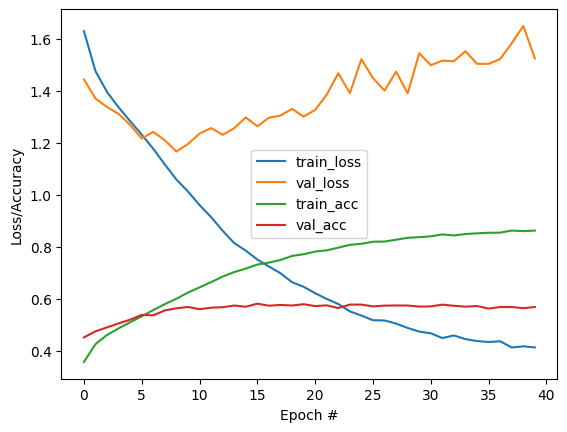

In [63]:
import matplotlib.pyplot as  plt
# plt.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["categorical_accuracy"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_categorical_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()